In [1]:
import json

with open('reviews.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract the desired information
extracted_data = []

for item in data:
    for review in item['reviews']:
        extracted_review = {
            'review_title': review['review_title'],
            'review_text': review['review_text'],
            'star_ratings': review['star_ratings']
        }
        extracted_data.append(extracted_review)

# Show the first few extracted reviews to verify the process
extracted_data[:3]

[{'review_title': 'Super cute but too small',
  'review_text': 'The item was in great condition and was super cute. An XL didn’t fit me though.',
  'star_ratings': 4},
 {'review_title': 'Second try',
  'review_text': 'I rented these in my usual size last time and they were just too snug. The large was better but the fit was still off for me. Bummed because the material is nice.',
  'star_ratings': 3},
 {'review_title': 'Fun shorts',
  'review_text': 'Loved the color and style. Size up, I’m usually a size 4/small but I wore a medium and they were still a little tight around the waist.',
  'star_ratings': 5}]

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Lowercase and remove punctuation
    tokens = [token.lower() for token in tokens if token.isalpha()]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply preprocessing to the review texts
for review in extracted_data:
    review['processed_review_text'] = preprocess_text(review['review_text'])

# Show the processed texts for verification
processed_texts = [review['processed_review_text'] for review in extracted_data]
processed_texts[:3]

[['item', 'great', 'condition', 'super', 'cute', 'xl', 'fit', 'though'],
 ['rented',
  'usual',
  'size',
  'last',
  'time',
  'snug',
  'large',
  'better',
  'fit',
  'still',
  'bummed',
  'material',
  'nice'],
 ['loved',
  'color',
  'style',
  'size',
  'usually',
  'size',
  'wore',
  'medium',
  'still',
  'little',
  'tight',
  'around',
  'waist']]

In [4]:
len(extracted_data) #check if it processed correctly

86682

In [5]:
for item in extracted_data:
    item.pop("review_title", None)  
    item.pop("review_text", None)   

with open("processed_reviews.json", 'w', encoding='utf-8') as file:
    json.dump(extracted_data, file, indent=4)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
reviews_sentences = [" ".join(review["processed_review_text"]) for review in extracted_data]

# Initialize the CountVectorizer
vectorizer = CountVectorizer(min_df=1000)

# Fit and transform the sentences to Bag of Words
X_bow = vectorizer.fit_transform(reviews_sentences)

# Convert the result to an array
bow_array = X_bow.toarray()

# Display the Bag of Words array
import pandas as pd

# Convert the BoW array to a DataFrame for better visualization
bow_df = pd.DataFrame(bow_array, columns=vectorizer.get_feature_names_out())

# Show the DataFrame for a more understandable representation
bow_df

,able,absolutely,almost,also,amazing,area,arm,around,back,baggy,...,wide,winter,wish,without,wore,work,worked,worn,would,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86680,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


LogisticRegression with multinomial

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bow, [review['star_ratings'] for review in extracted_data], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      0.30      0.34       946
           2       0.35      0.15      0.21      1323
           3       0.37      0.37      0.37      2583
           4       0.45      0.26      0.33      3802
           5       0.69      0.90      0.78      8682

    accuracy                           0.59     17337
   macro avg       0.38      0.33      0.34     17337
weighted avg       0.55      0.59      0.55     17337



c:\Users\juhen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\juhen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\juhen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

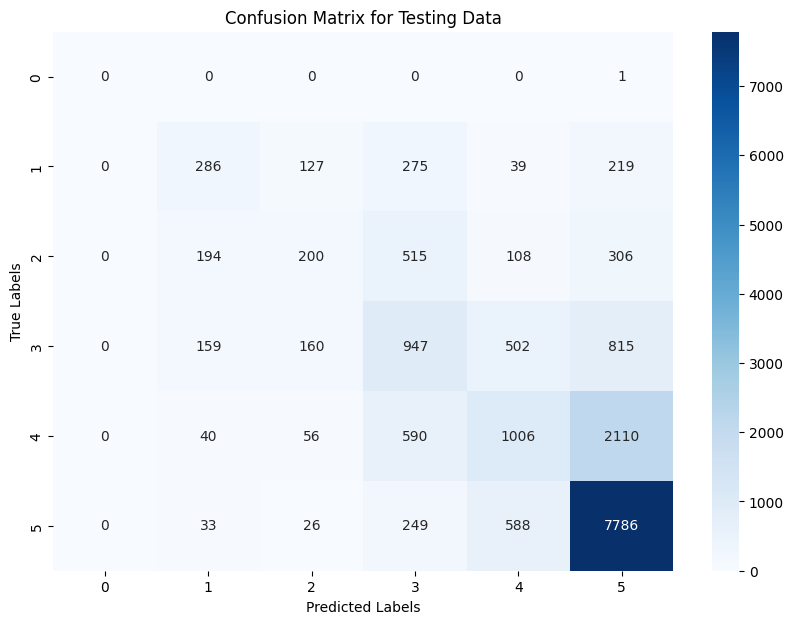

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_train_pred = logreg.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

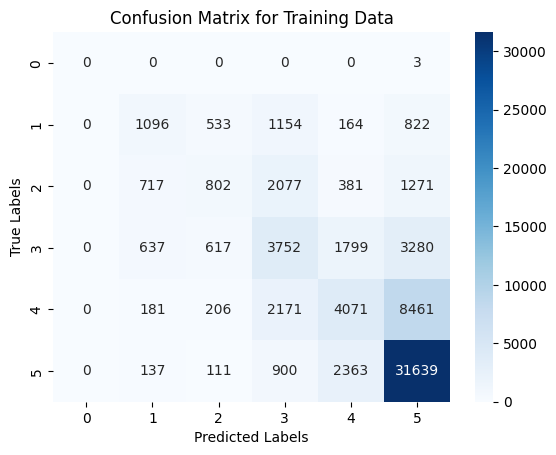

In [9]:
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [10]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)


print("Train MAE: {:.4f}\nTest MAE: {:.4f}\nTrain MSE: {:.4}\nTest MSE: {:.4f}\nTrain R^2: {:.4f}\nTest R^2: {:.4f}".format(train_mae, test_mae, train_mse, test_mse, train_r2, test_r2))

Train MAE: 0.5896
Test MAE: 0.5973
Train MSE: 1.095
Test MSE: 1.1069
Train R^2: 0.2410
Test R^2: 0.2344
